<h2><p align="center">Passo 1 - Importar as bibliotecas e consultar a base de dados do banco central através de uma API</h2></p>

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import seaborn as sns; sns.set()
today = date.today()
import bcb 
from bcb import sgs

#Obtendo dados da Base central do Banco do Brasil
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  return df
   
#Estes são exemplos de informações que podem ser consultados na base de dados do Banco Central
ipca = consulta_bc(433)
selic_meta = consulta_bc(432)

<h3><p align="center"> Variaveis a e b armazenam a lista de valores da SELIC e as referentes datas adquiridas a partir da base de dados. </h3></p>
<h3><p align="center"> Variaveis c e d armazenam a lista de valores do IPCA e as referentes datas adquiridas a partir da base de dados. </h2></p>

In [6]:
a = selic_meta['valor'].values.tolist()
b = pd.to_datetime(selic_meta['data'], dayfirst = True)
c = pd.to_datetime(ipca['data'], dayfirst= True)
d = ipca['valor'].values.tolist()
print(a)
print(b)

[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 29.5, 29.5, 29.5, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.

<h2><p align="center"> Grafico da taxa SELIC ao passar dos anos </h2></p>

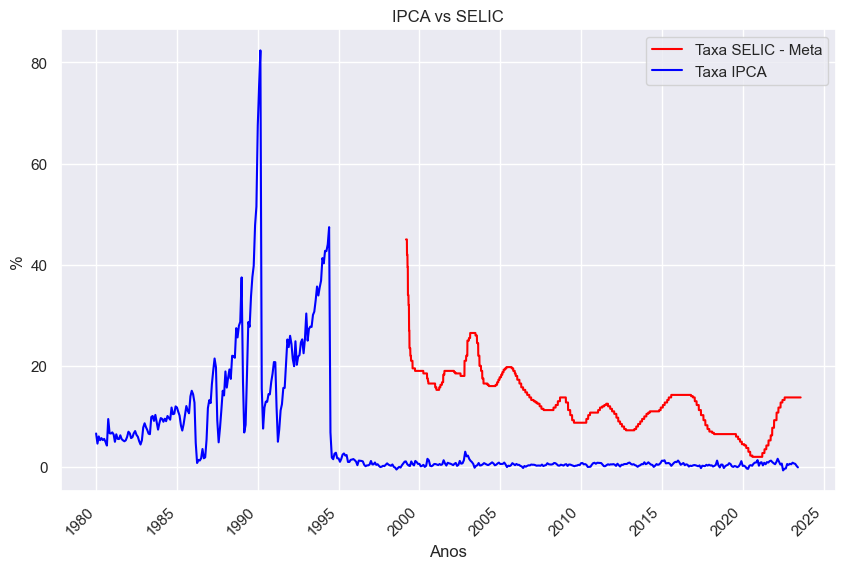

In [20]:
# Usar a biblioteca matplotlib para criar um espaçamento e intervalo definido entre os valores do grafico
plt.figure(figsize=(10,6))
plt.plot(b, a,  color='red', linestyle='solid')
plt.plot(c, d, color='blue', linestyle='solid')
plt.legend(['Taxa SELIC - Meta', 'Taxa IPCA'])
plt.xticks(rotation=45, ha='right')
plt.title("IPCA vs SELIC")
plt.xlabel("Anos")
plt.ylabel("%")
plt.grid("True")


<h1 align="center"> Funções , Objetos, Classes , Atributos e Métodos </h1>

In [9]:
def aplicarValor():
    aporte = float(input("Insira o valor do aporte para ser calculado"))
    return aporte

def tempoAplicado():
    tempoaplicadoemdias=int(input('Insira o número de dias que o valor ficou aplicado'))
    return tempoaplicadoemdias

def selicHoje():
    x = (selic_meta['valor'].iloc[-1])
    return x

def impRenAplicado():

    IR1=0.15/100
    IR2=0.175/100
    IR3=0.2/100
    IR4=0.225/100
    IOF=1
    tempoAplicado()

    if ((tempoAplicado() <= 180)):
        valorfinal = aplicarValor() + (aplicarValor() * tempoAplicado() * IR1 * selicdia)
        return valorfinal
    if ((tempoAplicado())>180 and (tempoAplicado())<=360):
        valorfinal = aplicarValor() + (aplicarValor() * tempoAplicado() * IR2 * selicdia)
        return valorfinal
    
    if ((tempoAplicado())>360 and (tempoAplicado())<=720):
        valorfinal = aplicarValor() + (aplicarValor() * tempoAplicado() * IR3 * selicdia)
        return valorfinal
        
    if ((tempoAplicado())>(720)):
        valorfinal = aplicarValor() + (aplicarValor() * tempoAplicado() * IR4 * selicdia)
        return valorfinal

In [10]:
print(f'Este é o valor do aporte inserido: {aplicarValor() :.2f} reais')
print(f'Este é o valor da taxa selic hoje: {selicHoje() :.2f}% ao ano')
selicmes = selicHoje()/12
print (f'Este seria o valor da taxa selic {selicmes:.4f}% ao mes')
selicdia = selicHoje()/365
print (f'E este seria o valor da taxa selic {selicdia:.5f}% ao dia')



ValueError: could not convert string to float: ''

In [ ]:
RendimentoMensal = aplicarValor()*(selicmes/100)
print (f'Este é o total após 30 dias: {RendimentoMensal:.1f}')

In [ ]:
ValorAcumuladoMensal = RendimentoMensal+aplicarValor()
print(ValorAcumuladoMensal)

In [ ]:
print("Este é o total após 1 dia")
RendimentoDiário = aplicarValor()*(selicdia/100)
print(RendimentoDiário)

In [ ]:
ValorAcumuladoDiario = RendimentoDiário+aplicarValor()
print(ValorAcumuladoDiario)


In [ ]:
Colunas = ["Rendimento Anual", "Aporte Inicial", "Rendimento Mensal", "ValorAcumuladoMensal"]
df = pd.DataFrame(columns=Colunas)
df

In [ ]:
X = [aplicarValor()/100, aplicarValor(), RendimentoDiário, aplicarValor()+RendimentoDiário]
print(X)

to_append = X
df_lenght = len(df) 
df.loc[df_lenght] = to_append
df

In [ ]:
i = 0
Y = [X[0],X[1]+RendimentoDiário,(aplicarValor()+RendimentoDiário)*aplicarValor()/(100*365),ValorAcumuladoDiario+(aplicarValor()+RendimentoDiário)*aplicarValor()/(100*365)]
to_append = Y
df_lenght = len(df)
df.loc[df_lenght] = to_append
df

In [ ]:

for i in range (3):
    to_append = Y
    Y = [X[i],X[i+1]+RendimentoDiário,(aplicarValor()+RendimentoDiário)*aplicarValor()/(100*365),ValorAcumuladoDiario+(aplicarValor()+RendimentoDiário)*aplicarValor()/(100*365)]
    df_lenght = len(df)
    df.loc[df_lenght] = to_append
    i=i+1
i=0
df